# **CASE: PERFIL DE IMÓVEIS RESIDENCIAIS**

---

### Leitura da base de dados

In [1]:
dados <- read.table("../Dados/Imoveis.txt",
                    sep    = "\t",
                    header = TRUE)

### Visualização da base de dados

In [2]:
View(dados)

ID_IMOVEL,BAIRRO_IMOVEL,METRAGEM,TIPO_IMOVEL,VALOR_VENDA,INCIDENCIA_LUZ,VAGAS_GARAGEM,FLUXO_VEICULOS,COMERCIOS_RAIO_1KM
<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>
1,Santa Rosa,140,Apartamento,517000,Pouca,2,Intenso,19
2,Santa Rosa,90,Apartamento,427000,Pouca,2,Intermediário,13
3,Santa Rosa,130,Casa,558000,Pouca,5,Baixo,11
4,Recanto Mar,50,Apartamento,354000,Pouca,2,Intenso,NA
5,Recanto Mar,70,Apartamento,416000,Nenhuma,NA,Intermediário,26
6,Jardim Sol,110,Apartamento,468000,Muita,NA,Intenso,27
7,Santa Rosa,90,Apartamento,436000,Nenhuma,NA,Intermediário,18
8,Jardim Sol,240,Casa,509000,Nenhuma,1,Intermediário,13
9,Recanto Mar,210,Casa,692000,Pouca,4,Intenso,24


### Análise de unicidade

*Verificação de quais registros estão duplicados em uma variável*

In [3]:
duplicated(dados$ID_IMOVEL)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

*Contabilização da quantidade de duplicados*

In [4]:
sum(duplicated(dados$ID_IMOVEL))

[1] 0

### Análise univariada: variáveis qualitativas *(exemplos)*

*Tabela de frequências absolutas, incluindo missings*

In [5]:
  table(dados$INCIDENCIA_LUZ, useNA = "ifany")


  Muita Nenhuma   Pouca 
    219     155     187 

*Tabela de frequências relativas, incluindo missings*

In [6]:
  prop.table(table(dados$INCIDENCIA_LUZ, useNA = "ifany"))


    Muita   Nenhuma     Pouca 
0.3903743 0.2762923 0.3333333 

*Arredondando as frequências na tabela anterior*

In [7]:
  round(prop.table(table(dados$INCIDENCIA_LUZ, useNA = "ifany")), 2) * 100


  Muita Nenhuma   Pouca 
     39      28      33 

*Ordenando categorias em uma variável qualitativa ordinal*

In [8]:
  dados$INCIDENCIA_LUZ <- factor(dados$INCIDENCIA_LUZ,
                                 levels = c("Nenhuma", "Pouca", "Muita"))

*Gráfico de barras (básico)*

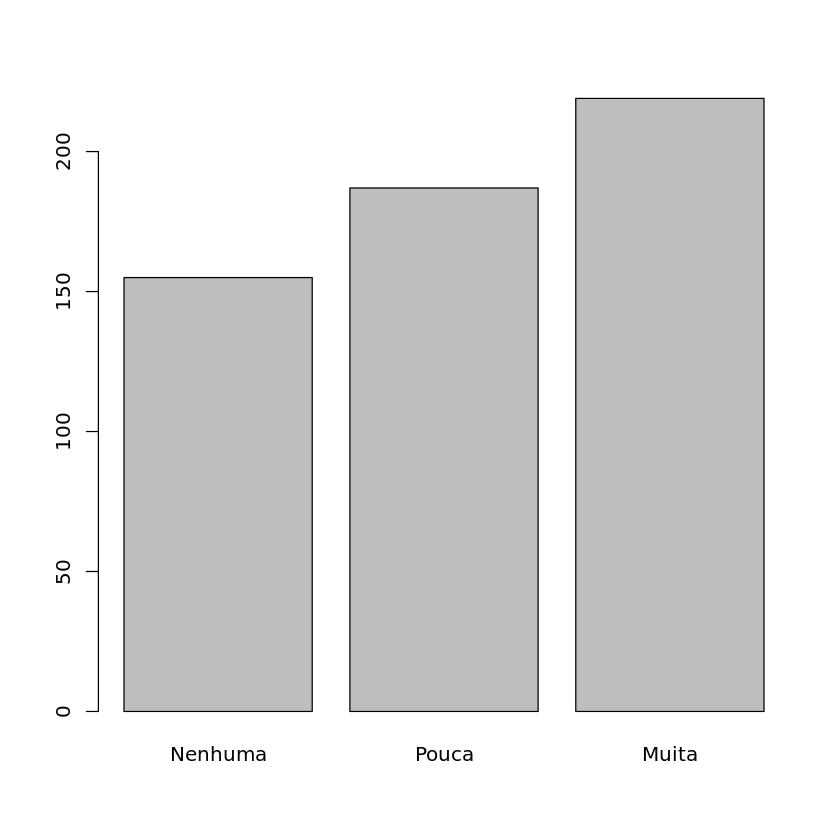

In [9]:
  tab_abs <- table(dados$INCIDENCIA_LUZ, useNA = "ifany")
  barplot(height = tab_abs)

*Gráfico de barras (formatado)*

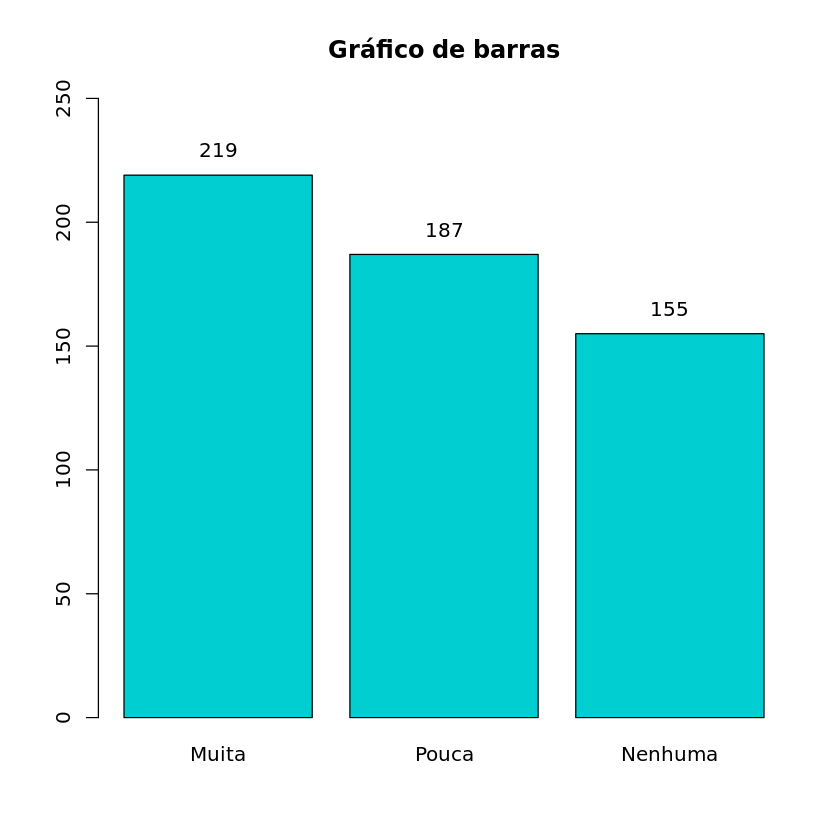

In [10]:
  tab_abs  <- table(dados$INCIDENCIA_LUZ, useNA = "ifany")
  p <- barplot(height = sort(tab_abs, decreasing = TRUE),
               main   = "Gráfico de barras",
               col    = "darkturquoise",
               ylim   = c(0, 250))
  text(x = p,
       y = sort(tab_abs, decreasing = TRUE) + 10,
       labels = sort(tab_abs, decreasing = TRUE))

*Gráfico de setores (básico)*

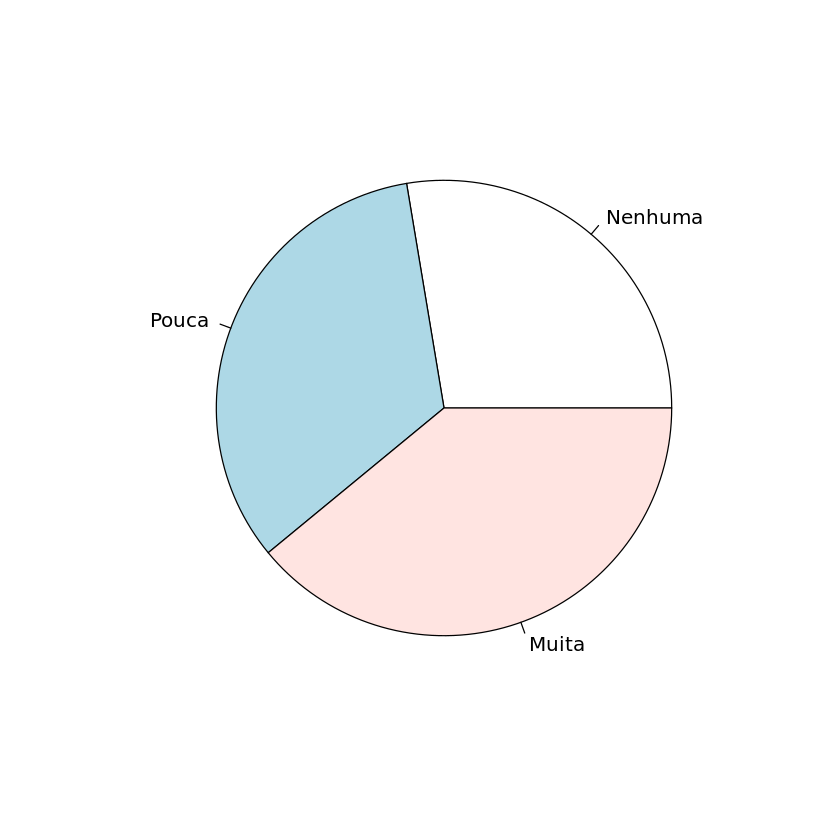

In [11]:
  tab_abs <- table(dados$INCIDENCIA_LUZ, useNA = "ifany")
  pie(x = tab_abs)

*Gráfico de setores (formatado)*

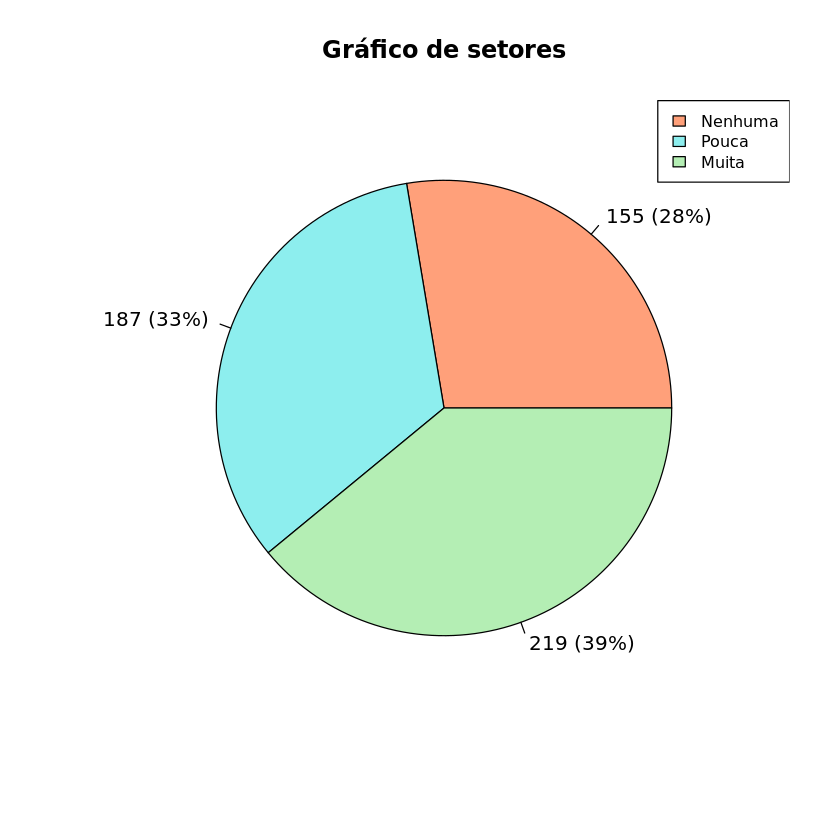

In [12]:
  tab_abs  <- table(dados$INCIDENCIA_LUZ,
                    useNA = "ifany")
  tab_perc <- 100 * round(prop.table(table(dados$INCIDENCIA_LUZ,
                                           useNA = "ifany")), 2)
  pie(x      = tab_abs,
      main   = "Gráfico de setores",
      col    = c("lightsalmon", "darkslategray2", "darkseagreen2"),
      labels = paste0(tab_abs, " (", tab_perc, "%)"))
  legend(x      = "topright",
         legend = names(tab_abs),
         cex    = 0.8,
         fill   = c("lightsalmon", "darkslategray2", "darkseagreen2"))

### Análise univariada: variáveis quantitativas *(exemplos)*

*Mínimo, máximo, quartis, mediana, média e qtde. de missings*

In [13]:
  summary(dados$METRAGEM)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   30.0    70.0   110.0   123.2   150.0   300.0 

*Moda*

In [14]:
  names(sort(-table(dados$METRAGEM)))[1]

[1] "70"

*Percentis*

In [15]:
  quantile(x     = dados$METRAGEM,
           probs = c(0.01, 0.80, 0.99),
           na.rm = TRUE)

1% 80% 99% 
 40 180 290

*Variância e desvio padrão*

In [16]:
  var(dados$METRAGEM, na.rm = TRUE)
  sd(dados$METRAGEM, na.rm = TRUE)

[1] 4346.179

[1] 65.92556

*Coeficiente de variação*

In [17]:
  sd(dados$METRAGEM, na.rm = TRUE) / mean(dados$METRAGEM, na.rm = TRUE)

[1] 0.5349955

*Amplitude*

In [18]:
  max(dados$METRAGEM, na.rm = TRUE) - min(dados$METRAGEM, na.rm = TRUE)

[1] 270

*Amplitude percentílica*

In [19]:
  as.numeric(quantile(dados$METRAGEM, probs = 0.99, na.rm = TRUE) -
               quantile(dados$METRAGEM, probs = 0.01, na.rm = TRUE))

[1] 250

*Intervalo interquartil*

In [20]:
  as.numeric(quantile(dados$METRAGEM, probs = 0.75, na.rm = TRUE) -
               quantile(dados$METRAGEM, probs = 0.25, na.rm = TRUE))

[1] 80

*Histograma (básico)*

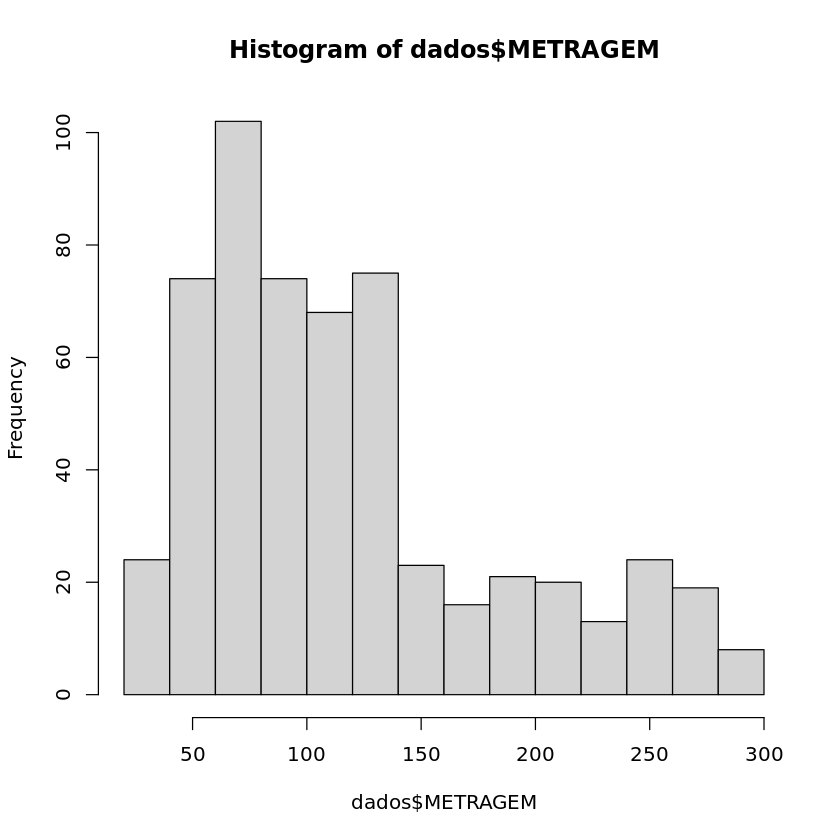

In [21]:
  hist(x = dados$METRAGEM)

*Histograma (formatado)*

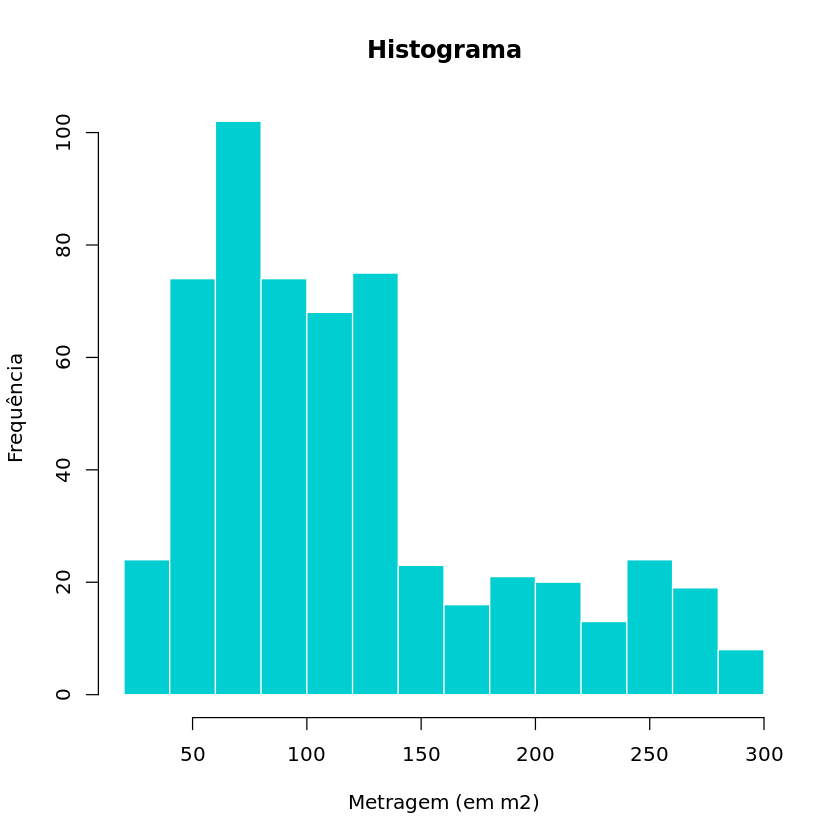

In [22]:
  hist(x      = dados$METRAGEM,
       main   = "Histograma",
       xlab   = "Metragem (em m2)",
       ylab   = "Frequência",
       col    = "darkturquoise",
       border = "white")

*Boxplot (básico)*

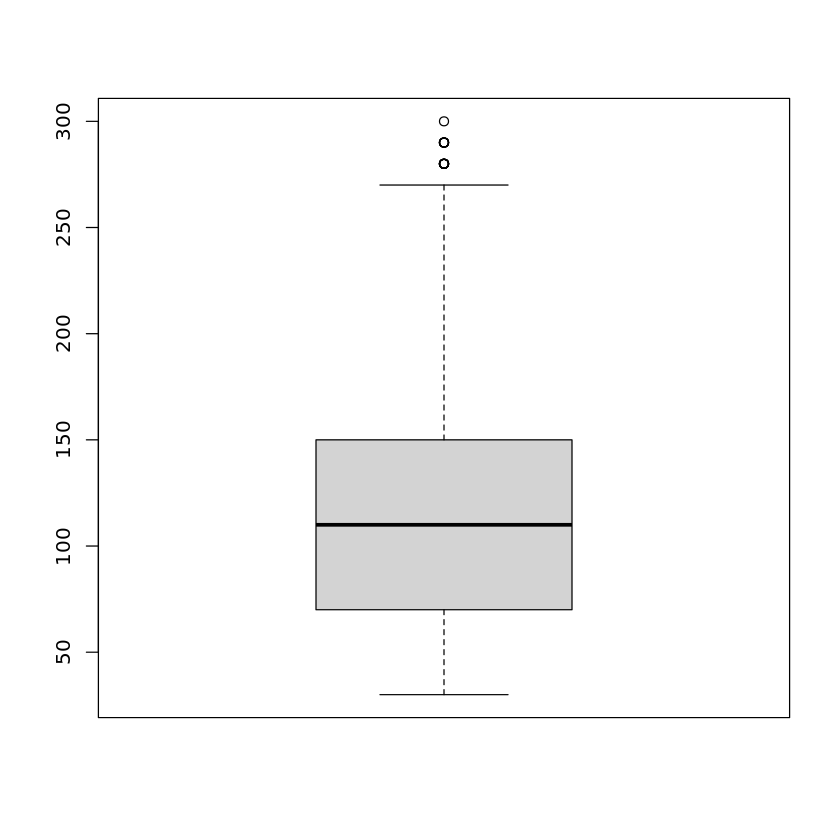

In [23]:
  boxplot(x = dados$METRAGEM)

*Boxplot (formatado)*

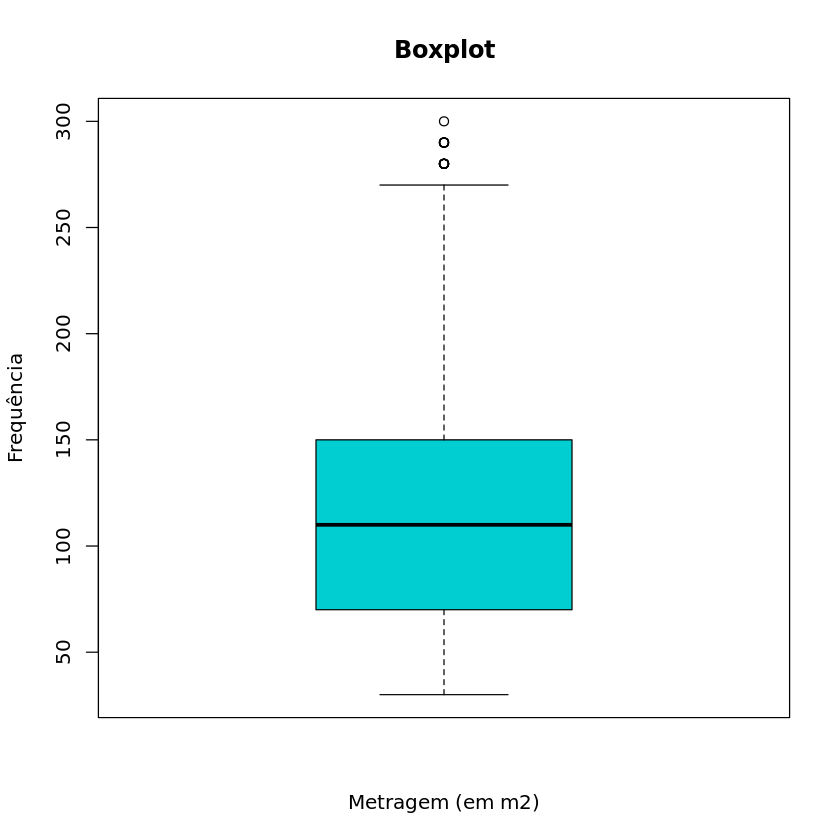

In [24]:
  boxplot(x    = dados$METRAGEM,
          main = "Boxplot",
          xlab = "Metragem (em m2)",
          ylab = "Frequência",
          col  = "darkturquoise")

### Análise bivariada/trivariada: qualitativas vs. qualitativas *(exemplos)*

*Tabela de frequências absolutas de dupla entrada*

In [25]:
  table(dados$INCIDENCIA_LUZ,
        dados$TIPO_IMOVEL,
        useNA = "ifany")

         
          Apartamento Casa
  Nenhuma         105   50
  Pouca           106   81
  Muita           112  107

*Tabela de frequências relativas de dupla entrada, somando 100% em cada linha*

In [26]:
  prop.table(table(dados$INCIDENCIA_LUZ,
                   dados$TIPO_IMOVEL,
                   useNA = "ifany"), 1)

         
          Apartamento      Casa
  Nenhuma   0.6774194 0.3225806
  Pouca     0.5668449 0.4331551
  Muita     0.5114155 0.4885845

*Tabela de frequências relativas de dupla entrada, somando 100% em cada coluna*

In [27]:
  prop.table(table(dados$INCIDENCIA_LUZ,
                   dados$TIPO_IMOVEL,
                   useNA = "ifany"), 2)

         
          Apartamento      Casa
  Nenhuma   0.3250774 0.2100840
  Pouca     0.3281734 0.3403361
  Muita     0.3467492 0.4495798

*Gráfico de barras empilhadas (básico)*

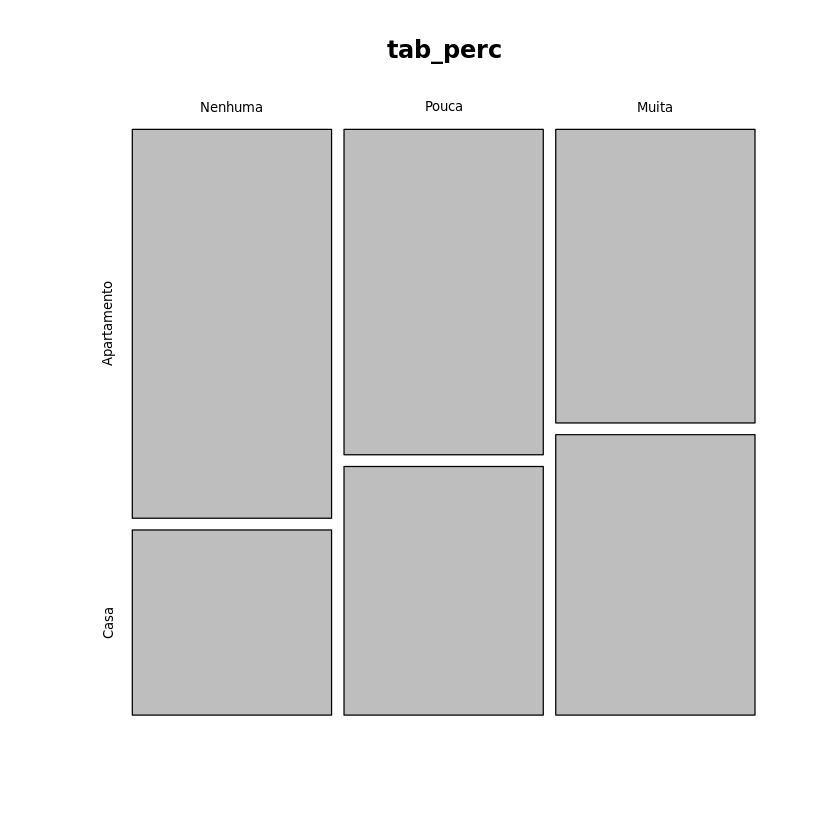

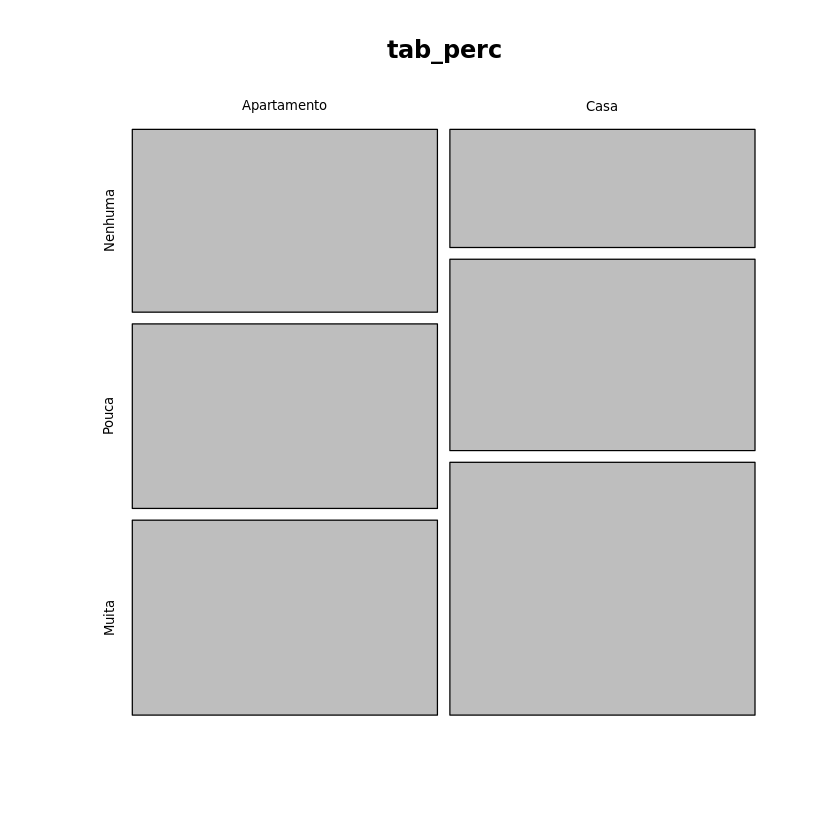

In [28]:
  tab_perc <- prop.table(table(dados$INCIDENCIA_LUZ,
                               dados$TIPO_IMOVEL,
                               useNA = "ifany"), 1)
  plot(tab_perc)

  tab_perc <- prop.table(table(dados$TIPO_IMOVEL,
                               dados$INCIDENCIA_LUZ,
                               useNA = "ifany"), 1)
  plot(tab_perc)

*Gráfico de barras empilhadas (formatado)*

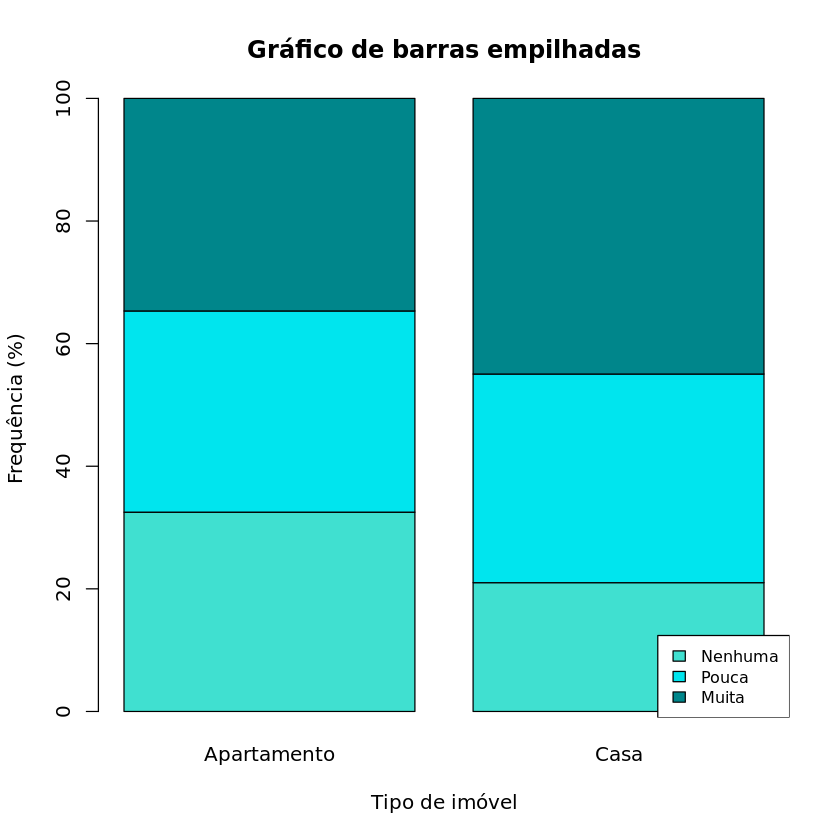

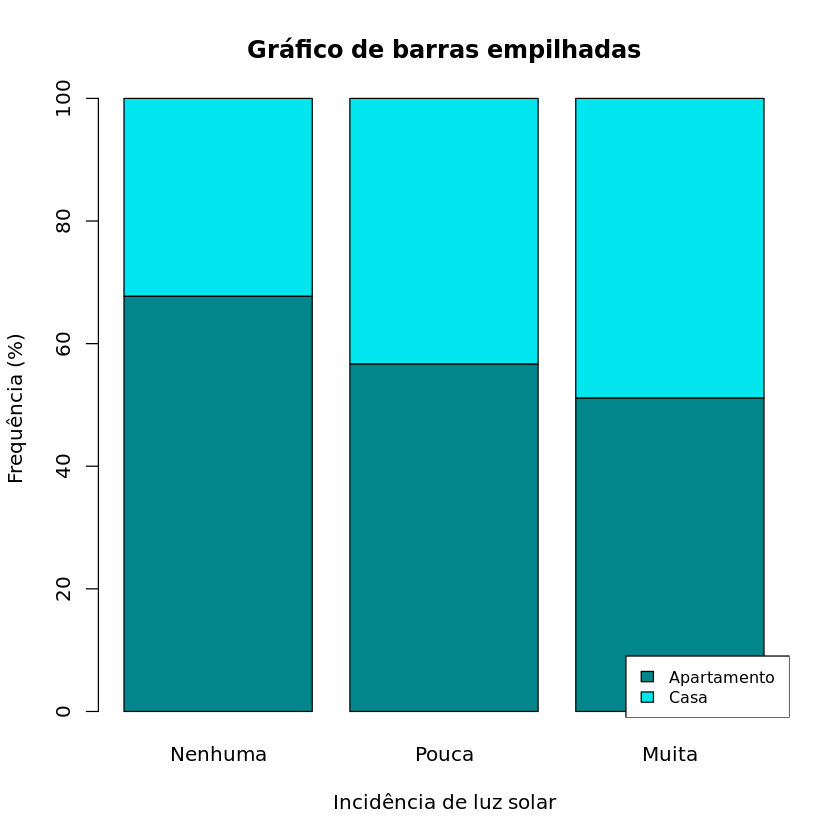

In [29]:
  tab_perc <- prop.table(table(dados$INCIDENCIA_LUZ,
                               dados$TIPO_IMOVEL,
                               useNA = "ifany"), 2) * 100
  barplot(height = tab_perc,
          col    = c("turquoise", "turquoise2", "turquoise4"),
          main   = "Gráfico de barras empilhadas",
          xlab   = "Tipo de imóvel",
          ylab   = "Frequência (%)")
  legend(x      = "bottomright",
         legend = row.names(tab_perc),
         cex    = 0.8,
         fill   = c("turquoise", "turquoise2", "turquoise4"))

  tab_perc <- prop.table(table(dados$TIPO_IMOVEL,
                               dados$INCIDENCIA_LUZ,
                               useNA = "ifany"), 2) * 100
  barplot(height = tab_perc,
          col    = c("turquoise4", "turquoise2"),
          main   = "Gráfico de barras empilhadas",
          xlab   = "Incidência de luz solar",
          ylab   = "Frequência (%)")
  legend(x      = "bottomright",
         legend = row.names(tab_perc),
         cex    = 0.8,
         fill   = c("turquoise4", "turquoise2"))

*Tabela de frequências absolutas de tripla entrada*

In [30]:
  table(dados$INCIDENCIA_LUZ[dados$TIPO_IMOVEL == "Apartamento"],
        dados$FLUXO_VEICULOS[dados$TIPO_IMOVEL == "Apartamento"],
        useNA = "ifany")
  table(dados$INCIDENCIA_LUZ[dados$TIPO_IMOVEL == "Casa"],
        dados$FLUXO_VEICULOS[dados$TIPO_IMOVEL == "Casa"],
        useNA = "ifany")

         
          Baixo Intenso Intermediário
  Nenhuma    38      33            34
  Pouca      38      36            32
  Muita      31      44            37

         
          Baixo Intenso Intermediário
  Nenhuma    14      22            14
  Pouca      32      27            22
  Muita      29      37            41

*Tabela de frequências relativas de tripla entrada, somando 100% em cada linha*

In [31]:
  prop.table(table(dados$INCIDENCIA_LUZ[dados$TIPO_IMOVEL == "Apartamento"],
                   dados$FLUXO_VEICULOS[dados$TIPO_IMOVEL == "Apartamento"],
                   useNA = "ifany"), 1)
  prop.table(table(dados$INCIDENCIA_LUZ[dados$TIPO_IMOVEL == "Casa"],
                   dados$FLUXO_VEICULOS[dados$TIPO_IMOVEL == "Casa"],
                   useNA = "ifany"), 1)

         
              Baixo   Intenso Intermediário
  Nenhuma 0.3619048 0.3142857     0.3238095
  Pouca   0.3584906 0.3396226     0.3018868
  Muita   0.2767857 0.3928571     0.3303571

         
              Baixo   Intenso Intermediário
  Nenhuma 0.2800000 0.4400000     0.2800000
  Pouca   0.3950617 0.3333333     0.2716049
  Muita   0.2710280 0.3457944     0.3831776

*Tabela de frequências relativas de tripla entrada, somando 100% em cada coluna*

In [32]:
  prop.table(table(dados$INCIDENCIA_LUZ[dados$TIPO_IMOVEL == "Apartamento"],
                   dados$FLUXO_VEICULOS[dados$TIPO_IMOVEL == "Apartamento"],
                   useNA = "ifany"), 2)
  prop.table(table(dados$INCIDENCIA_LUZ[dados$TIPO_IMOVEL == "Casa"],
                   dados$FLUXO_VEICULOS[dados$TIPO_IMOVEL == "Casa"],
                   useNA = "ifany"), 2)

         
              Baixo   Intenso Intermediário
  Nenhuma 0.3551402 0.2920354     0.3300971
  Pouca   0.3551402 0.3185841     0.3106796
  Muita   0.2897196 0.3893805     0.3592233

         
              Baixo   Intenso Intermediário
  Nenhuma 0.1866667 0.2558140     0.1818182
  Pouca   0.4266667 0.3139535     0.2857143
  Muita   0.3866667 0.4302326     0.5324675

### Análise bivariada/trivariada: quantitativas vs. quantitativas *(exemplos)*

*Gráfico de dispersão (básico)*

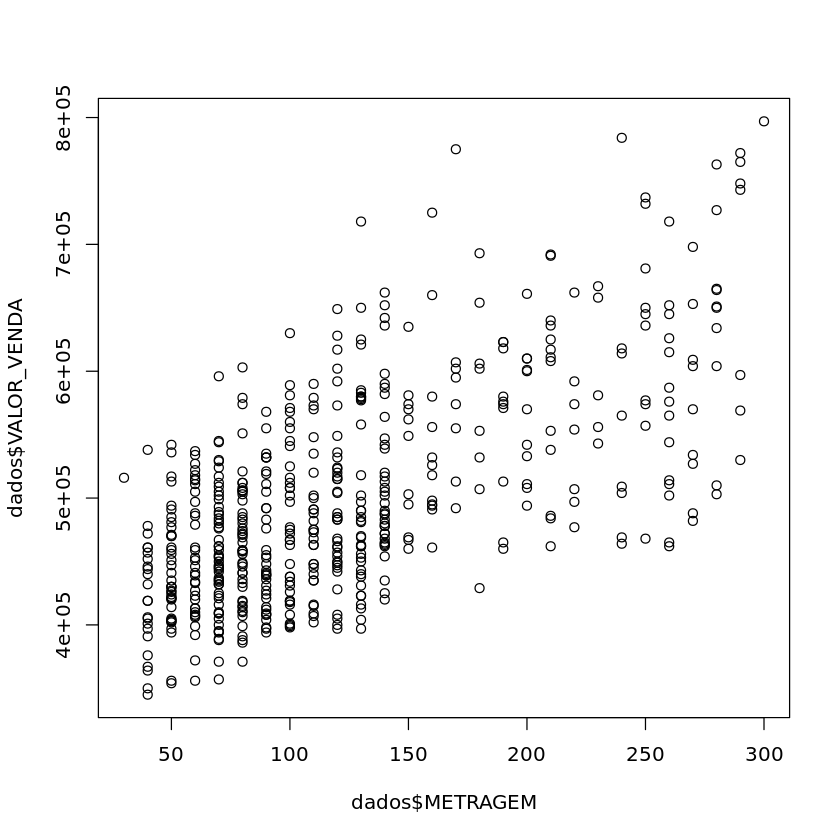

In [33]:
  plot(dados$METRAGEM, dados$VALOR_VENDA)

*Gráfico de dispersão (formatado)*

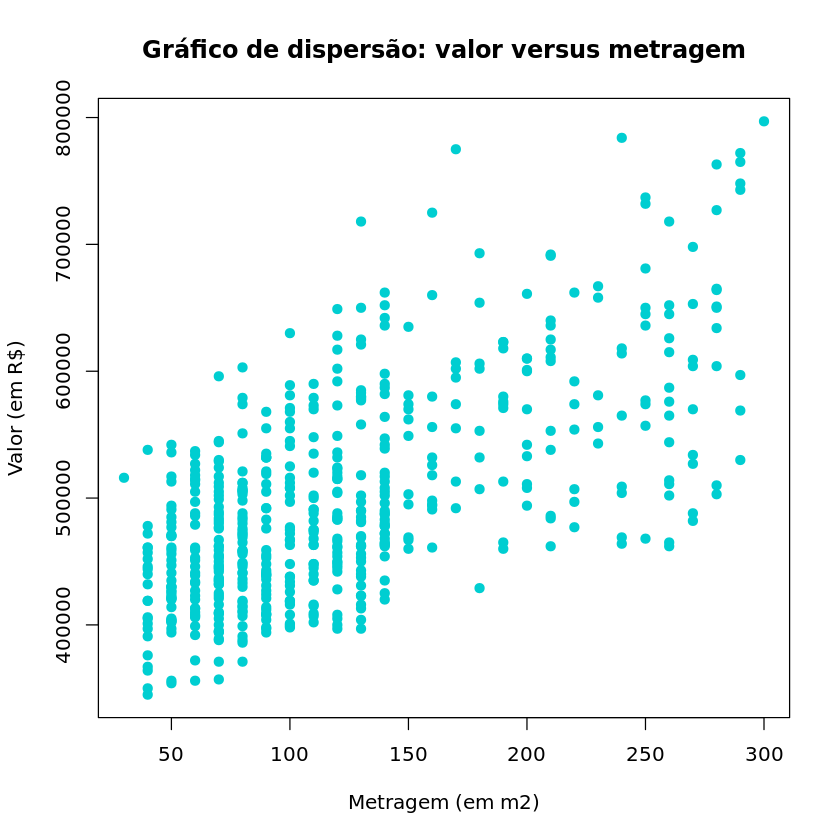

In [34]:
  options(scipen = 999) # comando para omitir notação científica na exibição de valores grandes
  plot(dados$VALOR_VENDA ~ dados$METRAGEM,
       col  = "darkturquoise",
       pch  = 19,
       main = "Gráfico de dispersão: valor versus metragem",
       xlab = "Metragem (em m2)",
       ylab = "Valor (em R$)")

*Gráfico de dispersão (formatado e com transparência nos pontos)*

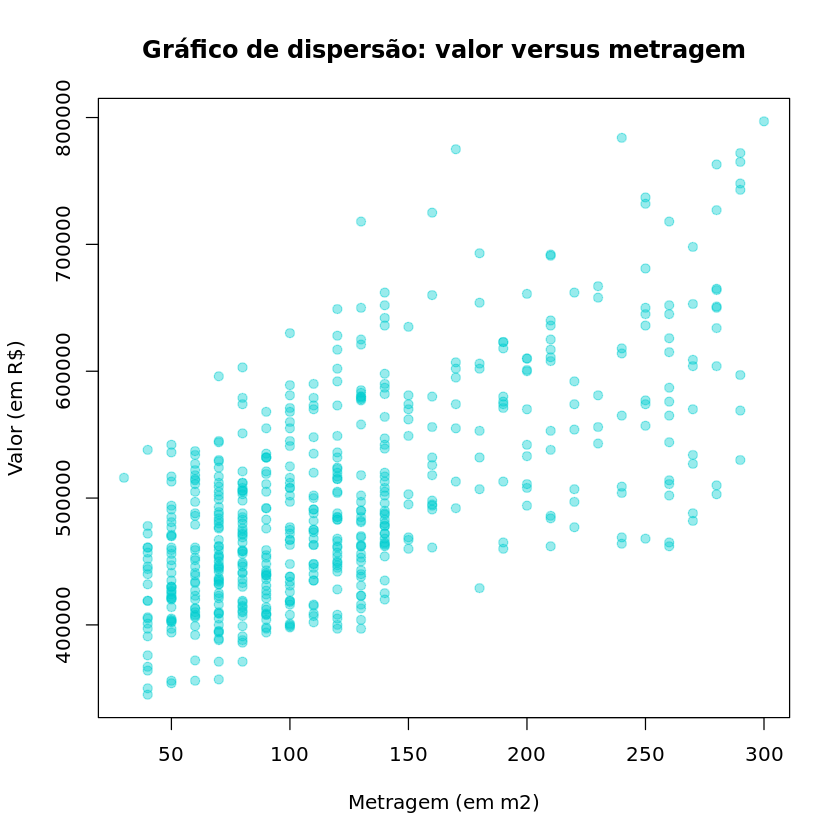

In [35]:
  options(scipen = 999)
  library(scales)
  plot(dados$VALOR_VENDA ~ dados$METRAGEM,
       col  = alpha("darkturquoise", 0.4),
       pch  = 19,
       main = "Gráfico de dispersão: valor versus metragem",
       xlab = "Metragem (em m2)",
       ylab = "Valor (em R$)")

### Análise bivariada/trivariada: qualitativas vs. quantitativas *(exemplos)*

*Principais medidas resumo com quebra por variável qualitativa*

In [36]:
  summary(dados$METRAGEM[dados$TIPO_IMOVEL == "Apartamento"])
  summary(dados$METRAGEM[dados$TIPO_IMOVEL == "Casa"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   70.00   90.00   89.26  120.00  150.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   30.0   110.0   170.0   169.3   230.0   300.0 

*Percentis com quebra por variável qualitativa*

In [37]:
  print("Apartamento")
  quantile(x     = dados$METRAGEM[dados$TIPO_IMOVEL == "Apartamento"],
           probs = c(0.01, 0.99),
           na.rm = TRUE)
  print("Casa")
  quantile(x     = dados$METRAGEM[dados$TIPO_IMOVEL == "Casa"],
           probs = c(0.01, 0.99),
           na.rm = TRUE)

[1] "Apartamento"


1% 99% 
 40 140

[1] "Casa"


1% 99% 
 40 290

*Histograma com quebra por variável qualitativa (básico)*

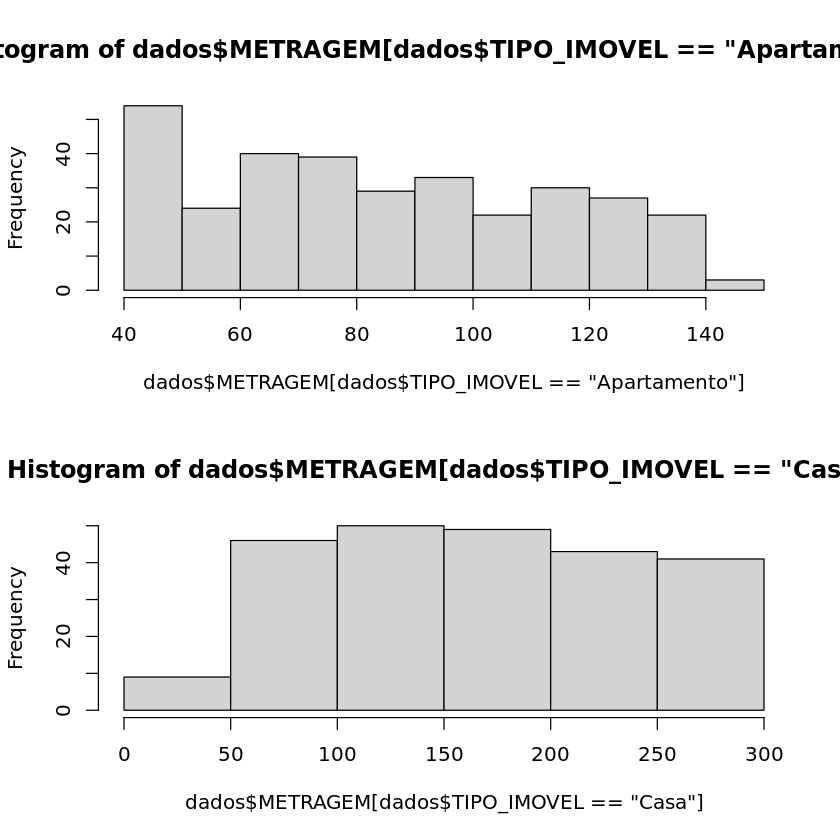

In [38]:
  par(mfrow = c(2,1))
  hist(x = dados$METRAGEM[dados$TIPO_IMOVEL == "Apartamento"])
  hist(x = dados$METRAGEM[dados$TIPO_IMOVEL == "Casa"])

*Histograma com quebra por variável qualitativa (formatado)*

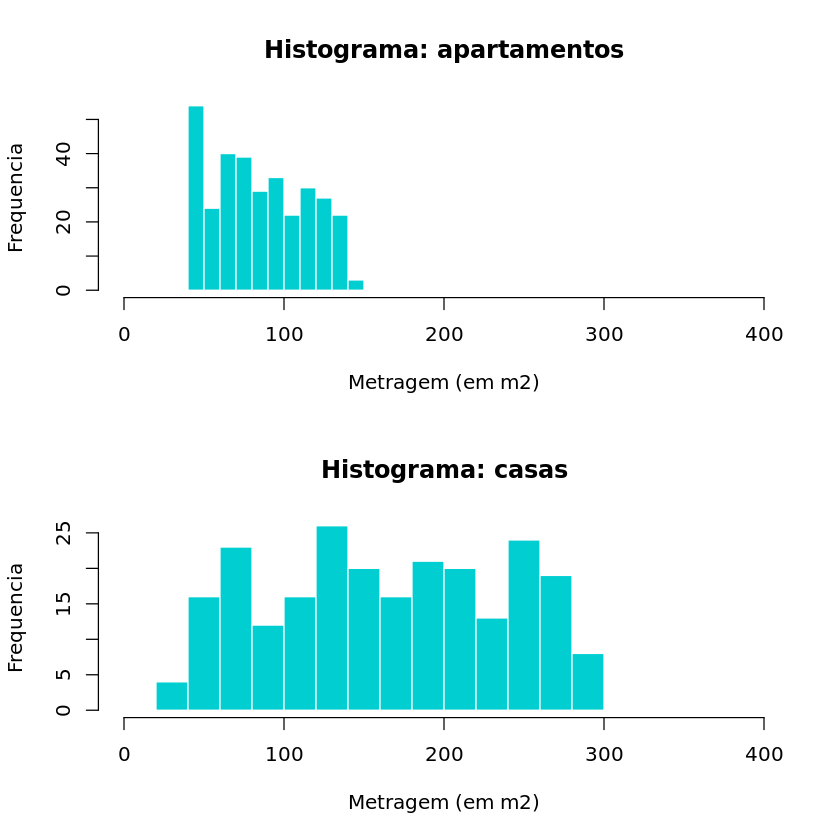

In [39]:
  par(mfrow = c(2,1))
  hist(x      = dados$METRAGEM[dados$TIPO_IMOVEL == "Apartamento"],
       main   = "Histograma: apartamentos",
       xlab   = "Metragem (em m2)",
       ylab   = "Frequencia",
       xlim = c(0,400),
       breaks = 10,
       col    = "darkturquoise",
       border = "white")
  hist(x      = dados$METRAGEM[dados$TIPO_IMOVEL == "Casa"],
       main   = "Histograma: casas",
       xlab   = "Metragem (em m2)",
       ylab   = "Frequencia",
       xlim = c(0,400),
       breaks = 10,
       col    = "darkturquoise",
       border = "white")

*Boxplot com quebra por variável qualitativa (básico)*

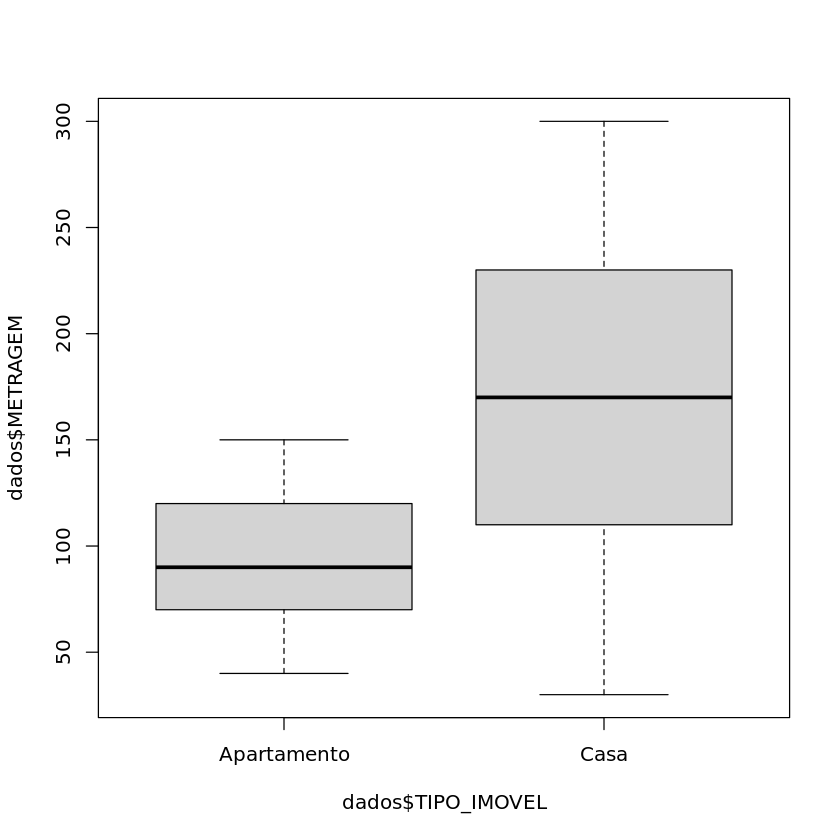

In [40]:
  par(mfrow = c(1,1))
  boxplot(formula = dados$METRAGEM ~ dados$TIPO_IMOVEL)

*Boxplot com quebra por variável qualitativa (formatado)*

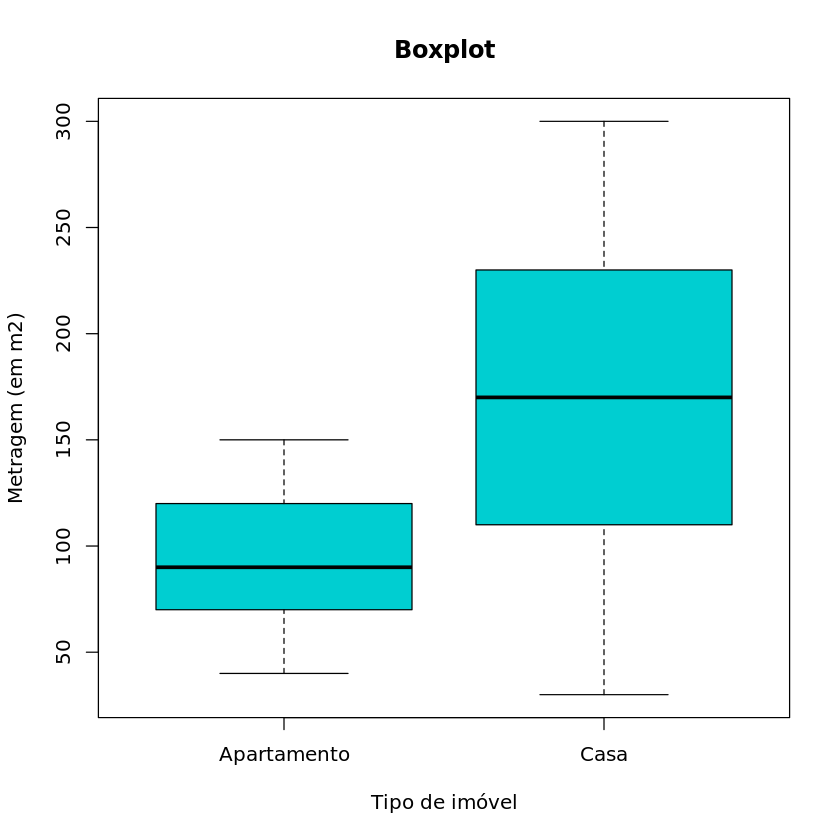

In [41]:
  boxplot(formula = dados$METRAGEM ~ dados$TIPO_IMOVEL,
          main    = "Boxplot",
          xlab    = "Tipo de imóvel",
          ylab    = "Metragem (em m2)",
          col     = "darkturquoise")

*Gráfico de dispersão com terceira dimensão qualitativa (básico)*

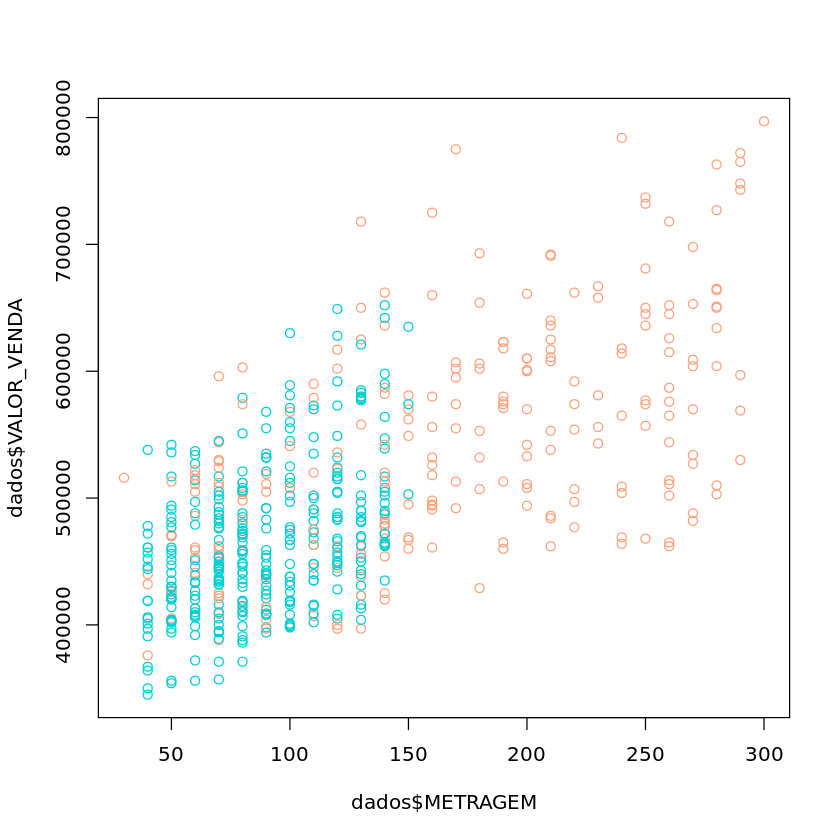

In [42]:
  options(scipen = 999)
  plot(dados$VALOR_VENDA ~ dados$METRAGEM,
       col  = ifelse(dados$TIPO_IMOVEL == "Apartamento", "darkturquoise", "lightsalmon"))

*Gráfico de dispersão com terceira dimensão qualitativa (formatado e com transparência nos pontos)*

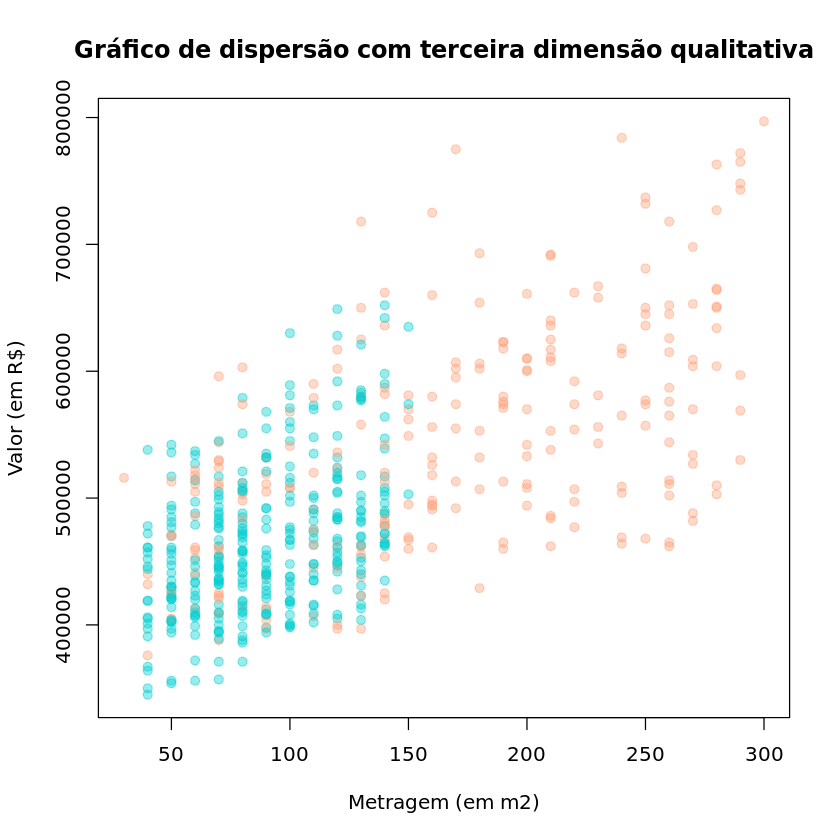

In [43]:
  options(scipen = 999)
  library(scales)
  plot(dados$VALOR_VENDA ~ dados$METRAGEM,
       col  = ifelse(dados$TIPO_IMOVEL == "Apartamento", alpha("darkturquoise", 0.4), alpha("lightsalmon", 0.4)),
       pch  = 19,
       main = "Gráfico de dispersão com terceira dimensão qualitativa",
       xlab = "Metragem (em m2)",
       ylab = "Valor (em R$)")

### **ITENS DE EXERCÍCIO**

### Item (a)

In [44]:
table(dados$BAIRRO_IMOVEL)
prop.table(table(dados$BAIRRO_IMOVEL))


 Jardim Sol Recanto Mar  Santa Rosa  Vila Verde 
         99         135         170         157 


 Jardim Sol Recanto Mar  Santa Rosa  Vila Verde 
  0.1764706   0.2406417   0.3030303   0.2798574 

In [45]:
table(dados$BAIRRO_IMOVEL, dados$TIPO_IMOVEL)
round(prop.table(table(dados$BAIRRO, dados$TIPO_IMOVEL), 2), 2)

             
              Apartamento Casa
  Jardim Sol           67   32
  Recanto Mar          75   60
  Santa Rosa           91   79
  Vila Verde           90   67

             
              Apartamento Casa
  Jardim Sol         0.21 0.13
  Recanto Mar        0.23 0.25
  Santa Rosa         0.28 0.33
  Vila Verde         0.28 0.28

### Item (b)

In [46]:
summary(dados$VAGAS_GARAGEM)
table(dados$VAGAS_GARAGEM)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.000   2.000   2.154   3.000   5.000      61 


  0   1   2   3   4   5 
 12 173 165  62  52  36 

In [47]:
table(dados$VAGAS_GARAGEM, dados$BAIRRO_IMOVEL)
round(prop.table(table(dados$VAGAS_GARAGEM, dados$BAIRRO_IMOVEL), 2), 2)

   
    Jardim Sol Recanto Mar Santa Rosa Vila Verde
  0          2           6          4          0
  1         37          36         47         53
  2         34          43         50         38
  3          4          17         18         23
  4          8          16         15         13
  5          4           7         15         10

   
    Jardim Sol Recanto Mar Santa Rosa Vila Verde
  0       0.02        0.05       0.03       0.00
  1       0.42        0.29       0.32       0.39
  2       0.38        0.34       0.34       0.28
  3       0.04        0.14       0.12       0.17
  4       0.09        0.13       0.10       0.09
  5       0.04        0.06       0.10       0.07

In [48]:
table(dados$VAGAS_GARAGEM, dados$TIPO_IMOVEL)
round(prop.table(table(dados$VAGAS_GARAGEM, dados$TIPO_IMOVEL), 2), 2)

   
    Apartamento Casa
  0           9    3
  1         166    7
  2         132   33
  3           0   62
  4           0   52
  5           0   36

   
    Apartamento Casa
  0        0.03 0.02
  1        0.54 0.04
  2        0.43 0.17
  3        0.00 0.32
  4        0.00 0.27
  5        0.00 0.19

### Item (c)

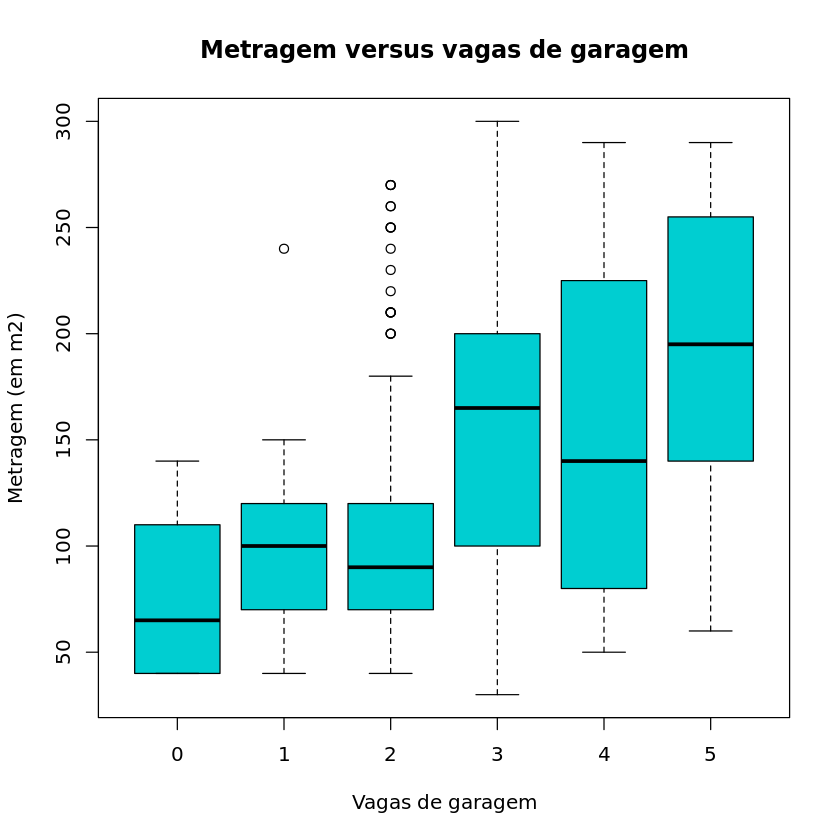

In [49]:
boxplot(dados$METRAGEM ~ dados$VAGAS_GARAGEM,
        main = "Metragem versus vagas de garagem",
        xlab = "Vagas de garagem",
        ylab = "Metragem (em m2)",
        col  = "darkturquoise")

### Item (d)

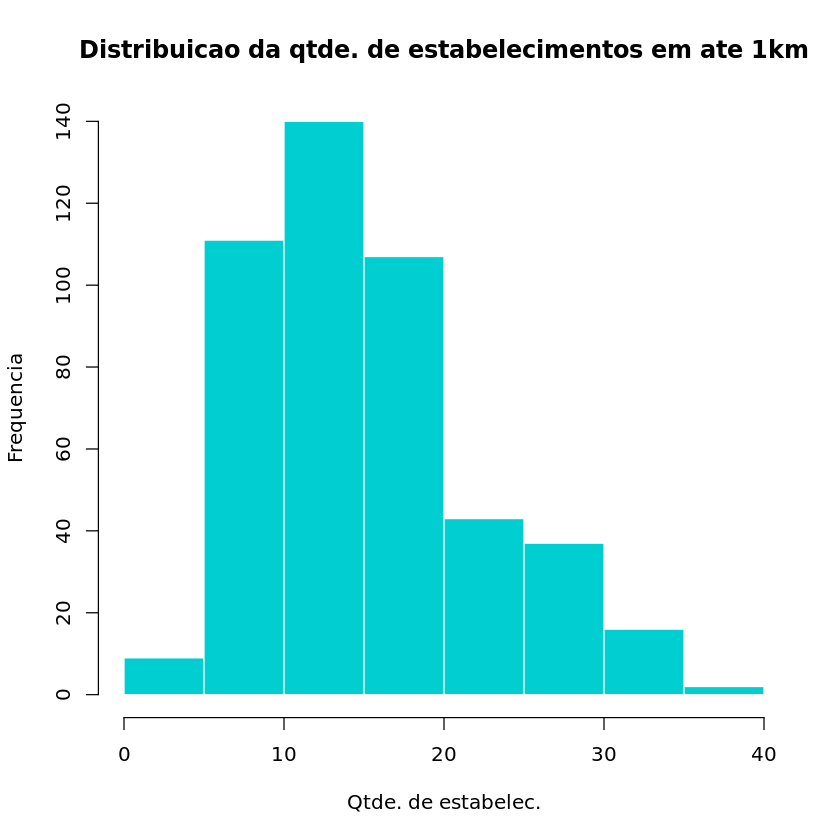

In [50]:
hist(dados$COMERCIOS_RAIO_1KM,
     main = "Distribuicao da qtde. de estabelecimentos em ate 1km",
     xlab = "Qtde. de estabelec.",
     ylab = "Frequencia",
     col  = "darkturquoise",
     border = "white")

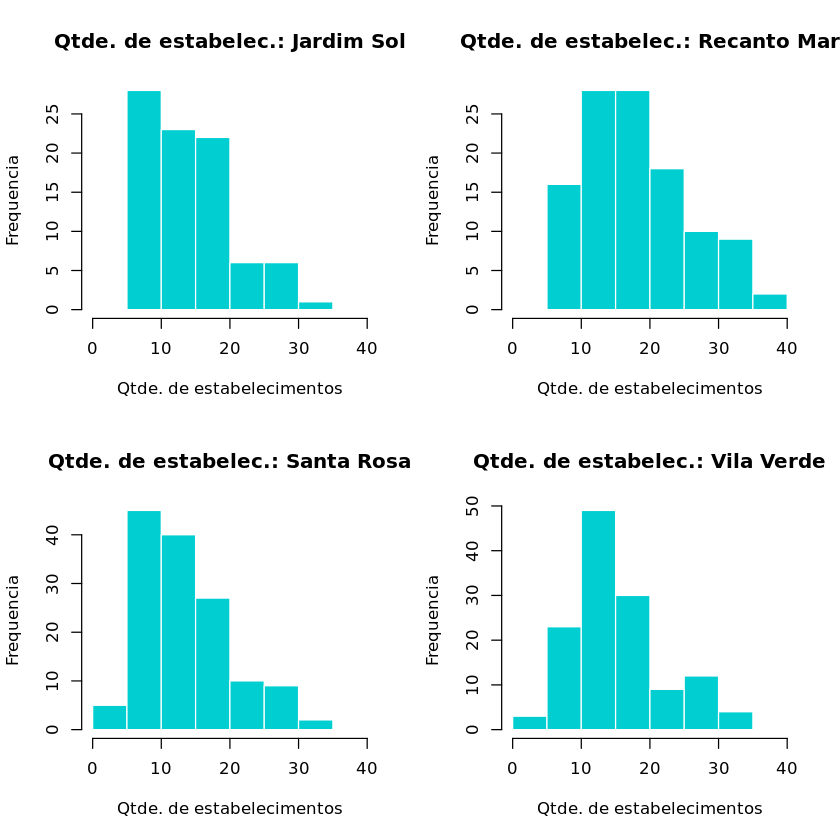

In [51]:
par(mfrow = c(2,2))
hist(dados$COMERCIOS_RAIO_1KM[dados$BAIRRO_IMOVEL == "Jardim Sol"],
     main = "Qtde. de estabelec.: Jardim Sol",
     xlab = "Qtde. de estabelecimentos",
     ylab = "Frequencia",
     xlim = c(0,40),
     col  = "darkturquoise",
     border = "white")
hist(dados$COMERCIOS_RAIO_1KM[dados$BAIRRO_IMOVEL == "Recanto Mar"],
     main = "Qtde. de estabelec.: Recanto Mar",
     xlab = "Qtde. de estabelecimentos",
     ylab = "Frequencia",
     xlim = c(0,40),
     col  = "darkturquoise",
     border = "white")
hist(dados$COMERCIOS_RAIO_1KM[dados$BAIRRO_IMOVEL == "Santa Rosa"],
     main = "Qtde. de estabelec.: Santa Rosa",
     xlab = "Qtde. de estabelecimentos",
     ylab = "Frequencia",
     xlim = c(0,40),
     col  = "darkturquoise",
     border = "white")
hist(dados$COMERCIOS_RAIO_1KM[dados$BAIRRO_IMOVEL == "Vila Verde"],
     main = "Qtde. de estabelec.: Vila Verde",
     xlab = "Qtde. de estabelecimentos",
     ylab = "Frequencia",
     xlim = c(0,40),
     col  = "darkturquoise",
     border = "white")

### Item (e)

In [52]:
table(dados$INCIDENCIA_LUZ, dados$BAIRRO_IMOVEL)
round(prop.table(table(dados$INCIDENCIA_LUZ, dados$BAIRRO_IMOVEL), 2), 2)

         
          Jardim Sol Recanto Mar Santa Rosa Vila Verde
  Nenhuma         20          32         52         51
  Pouca           32          52         52         51
  Muita           47          51         66         55

         
          Jardim Sol Recanto Mar Santa Rosa Vila Verde
  Nenhuma       0.20        0.24       0.31       0.32
  Pouca         0.32        0.39       0.31       0.32
  Muita         0.47        0.38       0.39       0.35

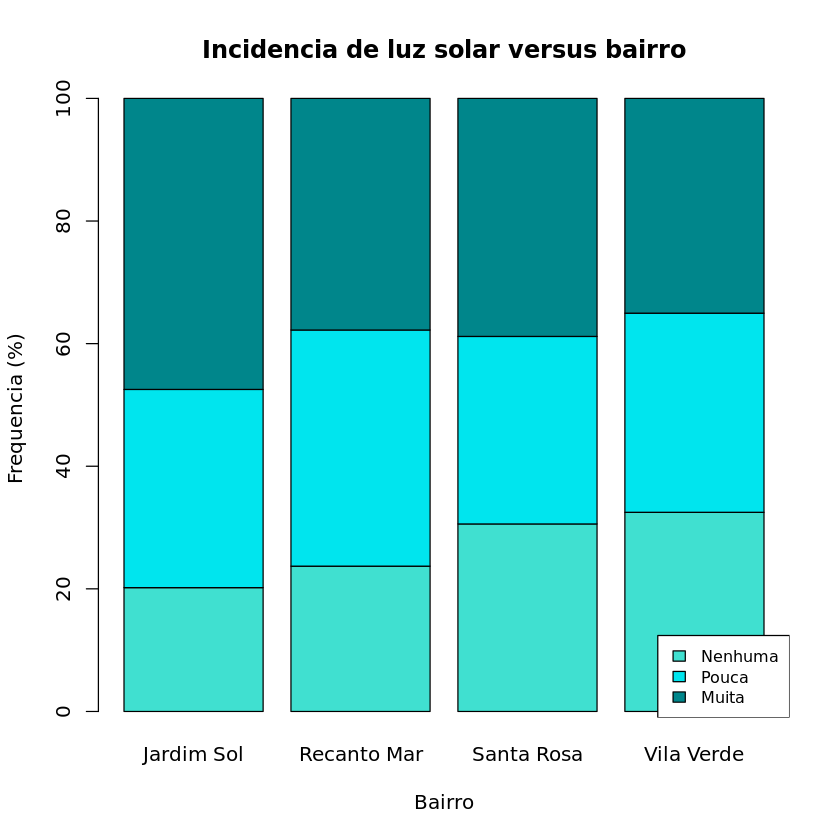

In [53]:
par(mfrow = c(1,1))
tab_perc <- prop.table(table(dados$INCIDENCIA_LUZ,
                             dados$BAIRRO_IMOVEL,
                             useNA = "ifany"), 2) * 100
barplot(height = tab_perc,
        col    = c("turquoise", "turquoise2", "turquoise4"),
        main   = "Incidencia de luz solar versus bairro",
        xlab   = "Bairro",
        ylab   = "Frequencia (%)")
legend(x      = "bottomright",
       legend = row.names(tab_perc),
       cex    = 0.8,
       fill   = c("turquoise", "turquoise2", "turquoise4"))

### Item (f)

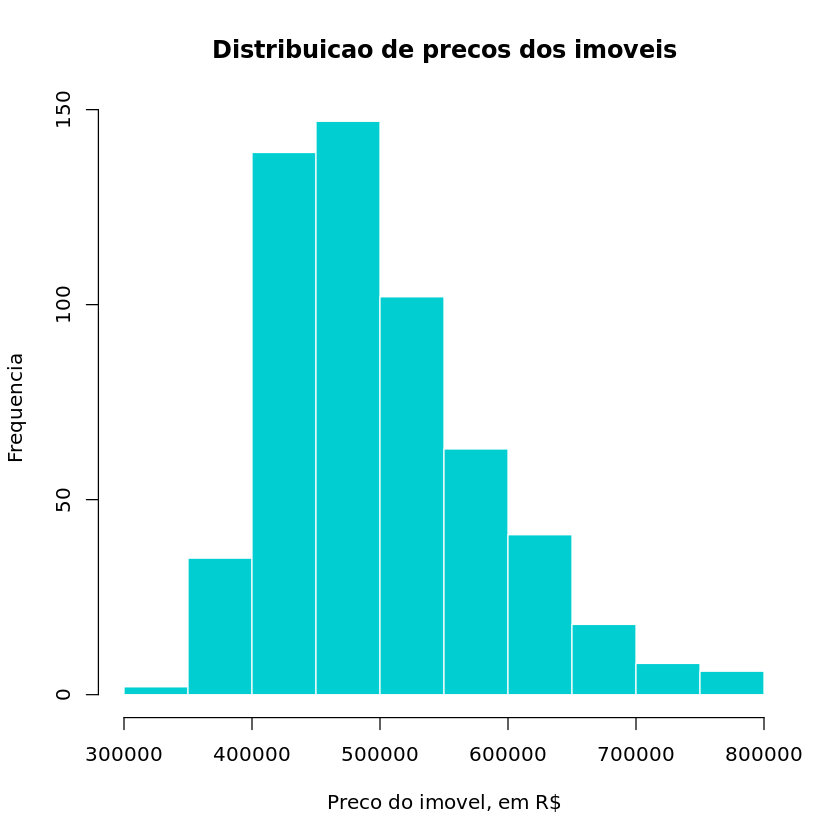

In [54]:
options(scipen = 999)
hist(dados$VALOR_VENDA,
     main = "Distribuicao de precos dos imoveis",
     xlab = "Preco do imovel, em R$",
     ylab = "Frequencia",
     col  = "darkturquoise",
     border = "white")

### Item (g)

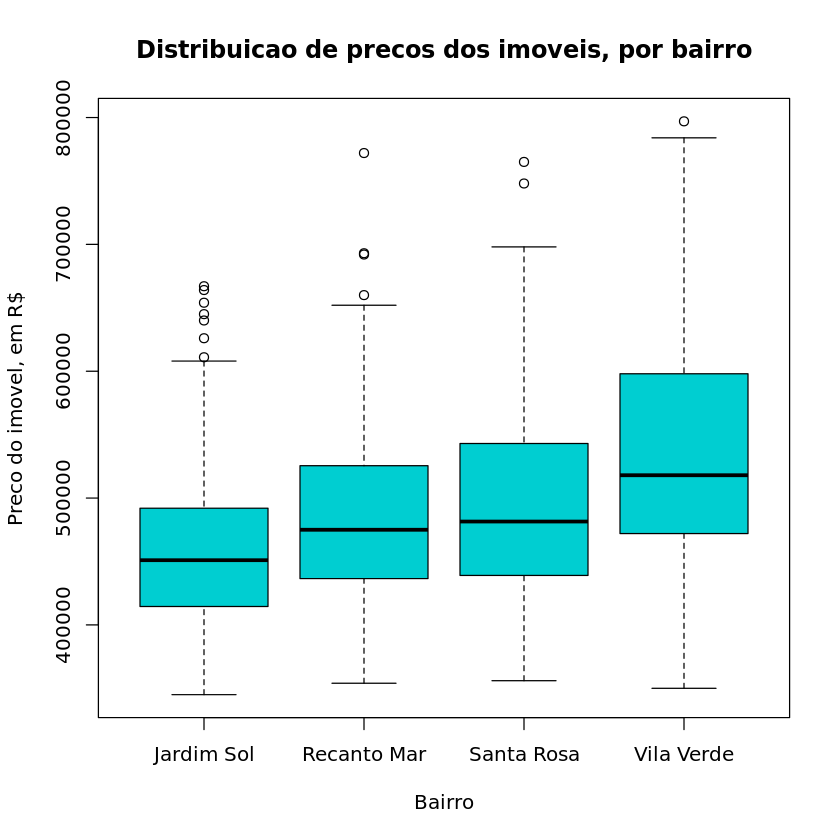

In [55]:
options(scipen = 999)
boxplot(dados$VALOR_VENDA ~ dados$BAIRRO_IMOVEL,
     main = "Distribuicao de precos dos imoveis, por bairro",
     xlab = "Bairro",
     ylab = "Preco do imovel, em R$",
     col  = "darkturquoise")

### Item (h)

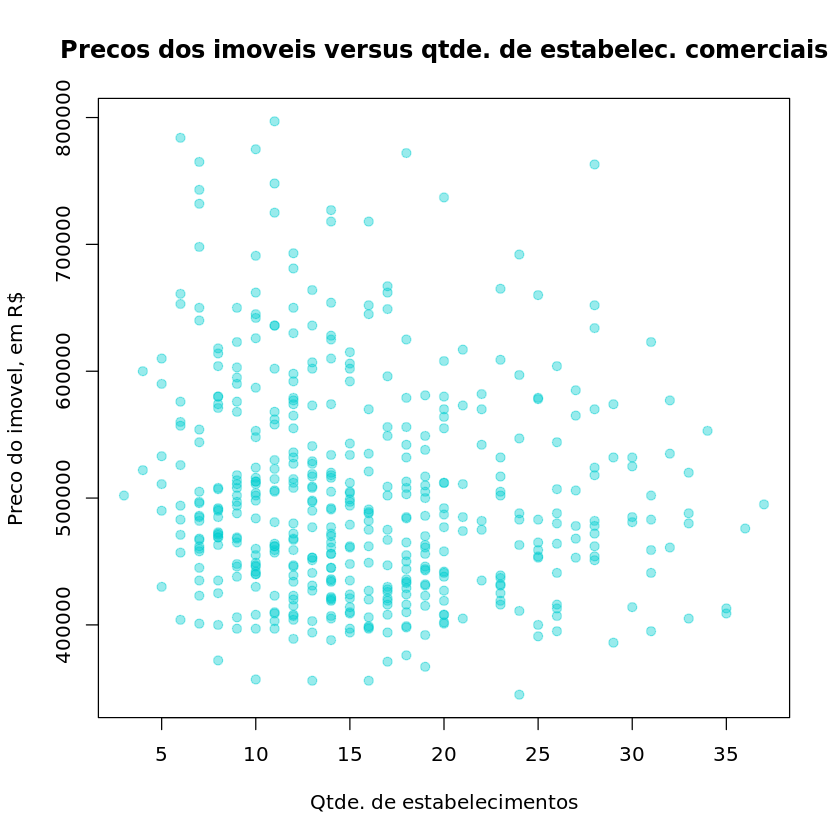

In [56]:
options(scipen = 999)
library(scales)

plot(dados$VALOR_VENDA ~ dados$COMERCIOS_RAIO_1KM,
     main = "Precos dos imoveis versus qtde. de estabelec. comerciais",
     xlab = "Qtde. de estabelecimentos",
     ylab = "Preco do imovel, em R$",
     col  = alpha("darkturquoise", 0.4),
     pch = 19)